In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
def L_e(r_d,nu,Q,T,B_n):
    l=35*(1/r_d)**2*(1.0E6/nu)*(T)*(1.0E-16/B_n)**2
    return l

In [3]:
def N_d(L_c,L_m,L_e,r_d,a): 
    c_d=np.log(8*r_d/a)-2
    q=(4*np.pi*1.0E-7)*c_d*r_d
    b_d=np.sqrt(1+(L_e*1.0E-6)/(q))-1
    f_1=1-q*b_d/(L_e*1.0E-6)
    f_2=(L_c+L_m)/L_e
    n=np.sqrt(f_2*(b_d/f_1))
    return n

In [4]:
def I_T(nu,L,Q,T,Delta_nu):
    i=2.96E-13*np.sqrt((1.0E6/nu)*(1/L)*(Q/1.0E4)*T*Delta_nu)
    return i

In [5]:
def I_B(N_d,r_d,B_n,Delta_nu):
    return 5.03E-14*(1/N_d)*r_d*(B_n/(1.0E-16))*np.sqrt(Delta_nu)

In [6]:
#function for graphing g
def g(nu,L,Q,T,Delta_nu,rho,E_o,d,r_e,N_l,l,N_d,r_d,B_n):
    deltaI_T=I_T(nu,L,Q,T,Delta_nu)
    deltaI_B=I_B(N_d,r_d,B_n,Delta_nu)
    denom=(2.34E-16)*(Q/1.0E4)*(1/L)*N_l*(E_o/10)*np.sqrt(rho)*d*(r_e**2)*np.log(1+l/r_e)
    cc=5*np.sqrt((deltaI_T)**2+(deltaI_B)**2)/denom
    return cc*1.0E-12

In [7]:
# limit on g based on magnetometer
def g_b(nu,Q,N_d,N_l,L,r_d,E_o,rho,r_e,d,l):
    B_d=2.8E-17*(nu/1.0E6)**(.25)
    denom=1.47E-20*(Q/1.0E4)*N_d*N_l*(1/L)*(1/r_d)*(E_o/10)*np.sqrt(rho)*r_e**2*d*np.log(1+l/r_e)
    return (B_d/denom)*1.0E-12

In [8]:
r_d=1 #in centimeters
nu=np.linspace(2.4E3,7.9E7,100)
Q=1.0E4
T=.5
B_n=1.0E-16
L_c=.5
L_m=2.5
a=7.436E-4
Delta_nu=1 #in mHz
rho=.3 #assumption A


E_o=75
d=10
r_e=30
N_l=10
l=15

L_e_a=L_e(r_d,nu,Q,T,B_n)
N_d_a=N_d(L_c,L_m,L_e_a,.01*r_d,a)

c_d=np.log(8*.01*r_d/a)-2
L_d=4*np.pi*1.0E-7*.01*r_d*(N_d_a**2)*c_d*1.0E6
L=L_m+L_d+L_c

g_s=g(nu,L,Q,T,Delta_nu,rho,E_o,d,r_e,N_l,l,N_d_a,r_d,B_n)

mag_lim=g_b(nu,Q,N_d_a,N_l,L,r_d,E_o,rho,r_e,d,l)

In [9]:
rho_o=1
g_s2=g(nu,L,Q,T,Delta_nu,rho_o,E_o,d,r_e,N_l,l,N_d_a,r_d,B_n)

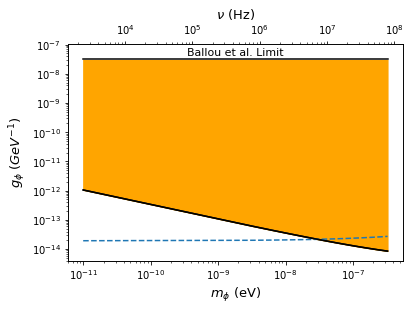

In [15]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

OSQAR=np.ones(len(nu))*3.2E-8
some_up_thing=np.ones(len(nu))*5.0E-8
m_a=(4.135667696E-15)*nu

ax1.loglog(m_a, g_s, 'k')
ax1.loglog(m_a,OSQAR,'k')
ax1.loglog(m_a,mag_lim,'--')
# ax1.loglog(m_a,g_s2)


ax1.fill_between(m_a,g_s,OSQAR,color='orange')
ax1.fill_between(m_a,OSQAR,some_up_thing,color='white')


ax1.set_xlabel('$m_\phi$ (eV)',size=13)
ax1.set_ylabel('$g_\phi$ ($GeV^{-1}$)',size=13)


ax2.loglog(nu, g_s,'k') # Create a dummy plot
ax2.set_xlabel('$\\nu$ (Hz)',size=13)


ax1.text(0.5, 0.98, 'Ballou et al. Limit',
        verticalalignment='top', horizontalalignment='center',
        transform=ax1.transAxes,
        color='black', fontsize=11)
# ax1.set_title('Scalar Dark Matter Sensitivity')

plt.show()

In [113]:
deltaI_T=I_T(nu,L,Q,T,Delta_nu)

In [114]:
deltaI_T

array([2.45949232e-12, 1.28403566e-13, 8.91115673e-14, 7.17361324e-14,
       6.14035707e-14, 5.43700931e-14, 4.91912114e-14, 4.51760848e-14,
       4.19473619e-14, 3.92792375e-14, 3.70272536e-14, 3.50941414e-14,
       3.34116979e-14, 3.19305018e-14, 3.06137514e-14, 2.94334056e-14,
       2.83676753e-14, 2.73993395e-14, 2.65145852e-14, 2.57021867e-14,
       2.49529155e-14, 2.42591054e-14, 2.36143292e-14, 2.30131524e-14,
       2.24509449e-14, 2.19237341e-14, 2.14280903e-14, 2.09610342e-14,
       2.05199644e-14, 2.01025978e-14, 1.97069212e-14, 1.93311518e-14,
       1.89737044e-14, 1.86331643e-14, 1.83082643e-14, 1.79978654e-14,
       1.77009411e-14, 1.74165631e-14, 1.71438897e-14, 1.68821559e-14,
       1.66306642e-14, 1.63887779e-14, 1.61559135e-14, 1.59315360e-14,
       1.57151534e-14, 1.55063123e-14, 1.53045946e-14, 1.51096134e-14,
       1.49210106e-14, 1.47384540e-14, 1.45616347e-14, 1.43902657e-14,
       1.42240792e-14, 1.40628256e-14, 1.39062714e-14, 1.37541985e-14,
      

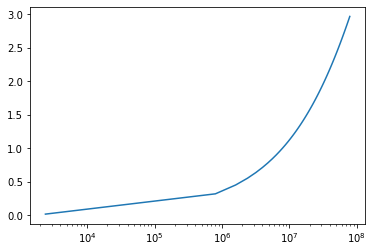

In [173]:
L_d_values=(4.0E-7*np.pi*.01*N_d_a**2*c_d)/1.0E-6

plt.semilogx(nu,L_d)

In [174]:
L_d

array([0.01752754, 0.31983343, 0.45162768, 0.5525677 , 0.63748362,
       0.71213191, 0.77946902, 0.84125326, 0.89863147, 0.95240106,
       1.00314314, 1.05129684, 1.09720361, 1.14113527, 1.18331237,
       1.22391687, 1.26310095, 1.30099348, 1.33770469, 1.37332981,
       1.40795174, 1.44164319, 1.4744684 , 1.50648439, 1.53774214,
       1.56828737, 1.59816133, 1.62740137, 1.65604144, 1.68411251,
       1.71164293, 1.73865874, 1.7651839 , 1.79124054, 1.81684915,
       1.84202873, 1.86679696, 1.89117031, 1.91516416, 1.93879289,
       1.96207   , 1.98500813, 2.0076192 , 2.02991439, 2.0519043 ,
       2.07359889, 2.0950076 , 2.11613938, 2.1370027 , 2.15760558,
       2.17795569, 2.19806027, 2.21792625, 2.23756022, 2.25696847,
       2.27615701, 2.29513157, 2.31389765, 2.33246049, 2.35082513,
       2.3689964 , 2.38697893, 2.40477715, 2.42239535, 2.43983762,
       2.45710792, 2.47421004, 2.49114765, 2.50792427, 2.52454331,
       2.54100805, 2.55732166, 2.5734872 , 2.58950762, 2.60538

In [186]:
g_s

array([7.44237887e-13, 4.15011494e-14, 2.95951506e-14, 2.43116582e-14,
       2.11595359e-14, 1.90072317e-14, 1.74177549e-14, 1.61819265e-14,
       1.51853906e-14, 1.43596589e-14, 1.36608799e-14, 1.30595022e-14,
       1.25347882e-14, 1.20716987e-14, 1.16590257e-14, 1.12882226e-14,
       1.09526429e-14, 1.06470296e-14, 1.03671626e-14, 1.01096097e-14,
       9.87154717e-15, 9.65062755e-15, 9.44488118e-15, 9.25264146e-15,
       9.07248736e-15, 8.90319882e-15, 8.74372159e-15, 8.59313936e-15,
       8.45065134e-15, 8.31555425e-15, 8.18722752e-15, 8.06512120e-15,
       7.94874593e-15, 7.83766467e-15, 7.73148566e-15, 7.62985661e-15,
       7.53245969e-15, 7.43900733e-15, 7.34923863e-15, 7.26291623e-15,
       7.17982367e-15, 7.09976306e-15, 7.02255311e-15, 6.94802736e-15,
       6.87603265e-15, 6.80642781e-15, 6.73908246e-15, 6.67387596e-15,
       6.61069653e-15, 6.54944040e-15, 6.49001110e-15, 6.43231879e-15,
       6.37627974e-15, 6.32181574e-15, 6.26885368e-15, 6.21732512e-15,
      

In [206]:
mag_lim

array([1.36551319e-14, 1.41654643e-14, 1.43911754e-14, 1.45654576e-14,
       1.47130583e-14, 1.48435794e-14, 1.49619503e-14, 1.50711013e-14,
       1.51729430e-14, 1.52688033e-14, 1.53596496e-14, 1.54462123e-14,
       1.55290595e-14, 1.56086430e-14, 1.56853293e-14, 1.57594207e-14,
       1.58311698e-14, 1.59007905e-14, 1.59684657e-14, 1.60343533e-14,
       1.60985906e-14, 1.61612982e-14, 1.62225825e-14, 1.62825377e-14,
       1.63412483e-14, 1.63987900e-14, 1.64552308e-14, 1.65106325e-14,
       1.65650511e-14, 1.66185379e-14, 1.66711396e-14, 1.67228992e-14,
       1.67738560e-14, 1.68240468e-14, 1.68735051e-14, 1.69222622e-14,
       1.69703474e-14, 1.70177876e-14, 1.70646082e-14, 1.71108328e-14,
       1.71564836e-14, 1.72015813e-14, 1.72461455e-14, 1.72901946e-14,
       1.73337459e-14, 1.73768159e-14, 1.74194198e-14, 1.74615725e-14,
       1.75032878e-14, 1.75445788e-14, 1.75854580e-14, 1.76259373e-14,
       1.76660281e-14, 1.77057410e-14, 1.77450864e-14, 1.77840742e-14,
      

In [213]:
def B_d(Q,N_d,N_l,L,r_d,g_num,E_o,rho,r_e,d,l):
    return 2.08E-20*(Q/1.0E4)*N_d*N_l*(1/L)*(1/r_d)*(g_num/1.0E-12)*(E_o/10)*np.sqrt(rho)*r_e**2*d*np.log(1+l/r_e)

In [215]:
L

array([3.00644525, 3.11760954, 3.16607308, 3.20319087, 3.23441625,
       3.26186601, 3.28662729, 3.30934667, 3.33044586, 3.35021807,
       3.36887701, 3.38658415, 3.40346505, 3.41961965, 3.43512906,
       3.4500602 , 3.46446902, 3.4784029 , 3.4919024 , 3.50500251,
       3.51773372, 3.53012279, 3.54219331, 3.55396627, 3.56546041,
       3.57669254, 3.58767783, 3.59843001, 3.60896157, 3.6192839 ,
       3.62940742, 3.6393417 , 3.64909557, 3.65867715, 3.66809397,
       3.67735304, 3.68646085, 3.69542344, 3.70424649, 3.71293528,
       3.72149476, 3.7299296 , 3.73824417, 3.74644259, 3.75452874,
       3.7625063 , 3.77037874, 3.77814935, 3.78582123, 3.79339735,
       3.80088051, 3.80827339, 3.81557853, 3.82279836, 3.82993519,
       3.83699122, 3.84396857, 3.85086925, 3.8576952 , 3.86444827,
       3.87113024, 3.87774279, 3.88428758, 3.89076616, 3.89718006,
       3.90353071, 3.90981952, 3.91604784, 3.92221696, 3.92832813,
       3.93438257, 3.94038143, 3.94632584, 3.95221689, 3.95805

In [216]:
B_d(Q,N_d_a,N_l,L,r_d,g_s,E_o,rho,r_e,d,l)

array([3.39163276e-16, 7.94133339e-17, 6.68347888e-17, 6.04266927e-17,
       5.62614883e-17, 5.32337108e-17, 5.08846376e-17, 4.89824277e-17,
       4.73946357e-17, 4.60389444e-17, 4.48609293e-17, 4.38228614e-17,
       4.28975853e-17, 4.20649508e-17, 4.13096235e-17, 4.06196822e-17,
       3.99856893e-17, 3.94000550e-17, 3.88565909e-17, 3.83501901e-17,
       3.78765923e-17, 3.74322096e-17, 3.70139940e-17, 3.66193358e-17,
       3.62459849e-17, 3.58919884e-17, 3.55556416e-17, 3.52354479e-17,
       3.49300874e-17, 3.46383898e-17, 3.43593137e-17, 3.40919283e-17,
       3.38353985e-17, 3.35889726e-17, 3.33519717e-17, 3.31237807e-17,
       3.29038405e-17, 3.26916421e-17, 3.24867201e-17, 3.22886487e-17,
       3.20970369e-17, 3.19115249e-17, 3.17317814e-17, 3.15575001e-17,
       3.13883978e-17, 3.12242116e-17, 3.10646979e-17, 3.09096296e-17,
       3.07587954e-17, 3.06119982e-17, 3.04690536e-17, 3.03297893e-17,
       3.01940438e-17, 3.00616655e-17, 2.99325122e-17, 2.98064499e-17,
      